In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import joblib
from rdkit import Chem
from rdkit.Chem import AllChem

In [2]:
# 1. 读取CSV文件
df = pd.read_csv(r"F:\分类数据\催化亚型活性内部训练集.csv",encoding = 'gbk')

# 2. 将pIC50列转化为标签（大于等于7为1，小于7为0）
df['label'] = np.where(df['pIC50'] >= 7, 1, 0)

In [3]:

# 3. SMILES转化为分子指纹（特征）
def smiles_to_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        return AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)  # 生成Morgan指纹
    else:
        return np.zeros(1024)  # 如果SMILES无效，返回全零向量

# 将SMILES转化为特征矩阵
X = np.array([smiles_to_fingerprint(smiles) for smiles in df['smiles']])

# 4. 标签列
y = df['label']

[12:46:00] DEPRECATION WARNING: please use MorganGenerator
[12:46:00] DEPRECATION WARNING: please use MorganGenerator
[12:46:00] DEPRECATION WARNING: please use MorganGenerator
[12:46:00] DEPRECATION WARNING: please use MorganGenerator
[12:46:00] DEPRECATION WARNING: please use MorganGenerator
[12:46:00] DEPRECATION WARNING: please use MorganGenerator
[12:46:00] DEPRECATION WARNING: please use MorganGenerator
[12:46:00] DEPRECATION WARNING: please use MorganGenerator
[12:46:00] DEPRECATION WARNING: please use MorganGenerator
[12:46:00] DEPRECATION WARNING: please use MorganGenerator
[12:46:00] DEPRECATION WARNING: please use MorganGenerator
[12:46:00] DEPRECATION WARNING: please use MorganGenerator
[12:46:00] DEPRECATION WARNING: please use MorganGenerator
[12:46:00] DEPRECATION WARNING: please use MorganGenerator
[12:46:00] DEPRECATION WARNING: please use MorganGenerator
[12:46:00] DEPRECATION WARNING: please use MorganGenerator
[12:46:00] DEPRECATION WARNING: please use MorganGenerat

In [4]:

# 3. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

=== RandomForest ===
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1053
           1       0.85      0.87      0.86      1078

    accuracy                           0.86      2131
   macro avg       0.86      0.86      0.86      2131
weighted avg       0.86      0.86      0.86      2131

=== GradientBoosting ===
              precision    recall  f1-score   support

           0       0.76      0.82      0.79      1053
           1       0.81      0.75      0.78      1078

    accuracy                           0.78      2131
   macro avg       0.78      0.78      0.78      2131
weighted avg       0.78      0.78      0.78      2131

=== ExtraTrees ===
              precision    recall  f1-score   support

           0       0.78      0.86      0.82      1053
           1       0.85      0.77      0.81      1078

    accuracy                           0.81      2131
   macro avg       0.82      0.81      0.81      2131
weighted 

F:\anacoda\envs\learn\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
F:\anacoda\envs\learn\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


=== LightGBM ===
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1053
           1       0.83      0.85      0.84      1078

    accuracy                           0.84      2131
   macro avg       0.84      0.84      0.84      2131
weighted avg       0.84      0.84      0.84      2131



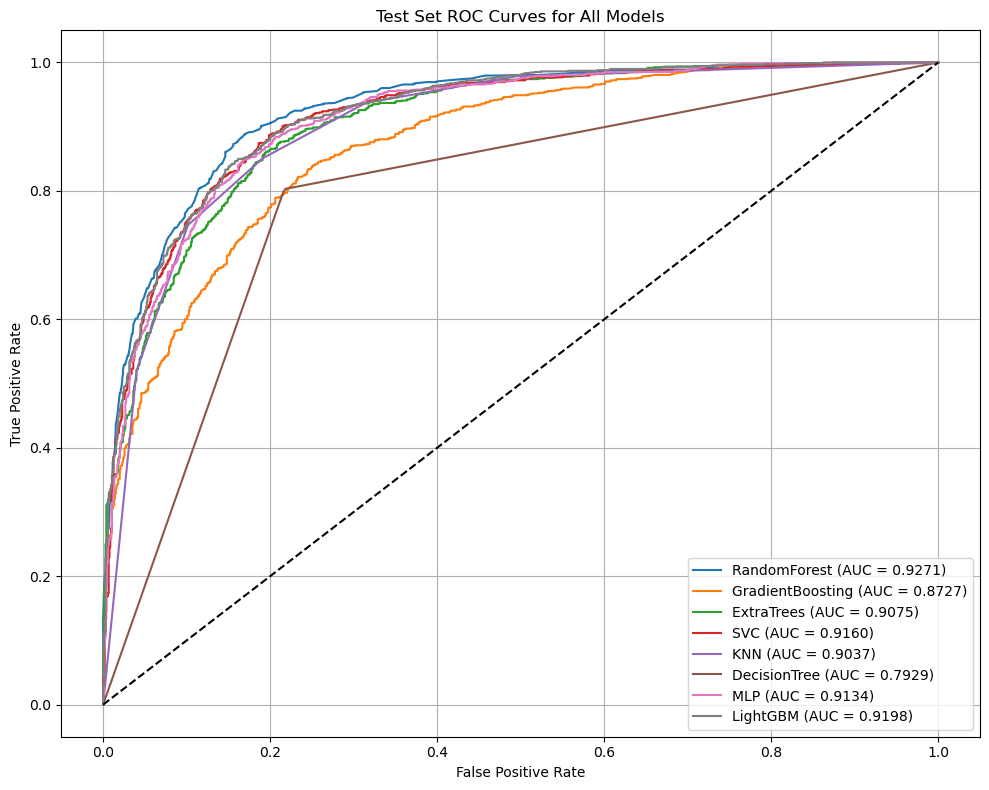


汇总分类报告表：
              Model  Precision (0)  Recall (0)  F1-score (0)  Precision (1)  \
0      RandomForest       0.860174    0.847104      0.853589       0.852834   
1  GradientBoosting       0.760850    0.815764      0.787351       0.806387   
2        ExtraTrees       0.782084    0.862298      0.820235       0.850515   
3               SVC       0.845631    0.827160      0.836294       0.834696   
4               KNN       0.841066    0.809117      0.824782       0.820215   
5      DecisionTree       0.792507    0.783476      0.787966       0.790826   
6               MLP       0.821956    0.846154      0.833879       0.845272   
7          LightGBM       0.846304    0.826211      0.836136       0.834089   

   Recall (1)  F1-score (1)  Accuracy  
0    0.865492      0.859116  0.856405  
1    0.749536      0.776923  0.782262  
2    0.765306      0.805664  0.813233  
3    0.852505      0.843506  0.839981  
4    0.850649      0.835155  0.830127  
5    0.799629      0.795203  0.791647 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc

# # 1. 读取CSV文件
# df = pd.read_csv(r"F:\分类数据\催化亚型活性内部训练集.csv", encoding='gbk')

# # 2. 生成 label（二分类：pIC50 >= 7 为1，否则为0）
# df['label'] = np.where(df['pIC50'] >= 7, 1, 0)

# # 3. 特征和标签
# X = df.drop(columns=['pIC50', 'label'])
# y = df['label']

# 4. 数据拆分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. 模型字典
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    "ExtraTrees": ExtraTreesClassifier(n_estimators=30, max_depth=15, min_samples_split=2, min_samples_leaf=2, random_state=42),
    "SVC": SVC(kernel='rbf', probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000),
    "LightGBM": lgb.LGBMClassifier(objective='binary', random_state=42)  # 更正为binary
}

# 6. 保存报告和AUC曲线数据
reports = []
plt.figure(figsize=(10, 8))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # 分类报告
    report = classification_report(y_test, y_pred, output_dict=True)
    reports.append((name, report))
    print(f"=== {name} ===")
    print(classification_report(y_test, y_pred))

    # 计算ROC曲线
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.4f})")

# ROC 曲线图
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Test Set ROC Curves for All Models")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 7. 分类报告汇总成表格
summary_df = pd.DataFrame([
    {
        "Model": name,
        "Precision (0)": rep["0"]["precision"],
        "Recall (0)": rep["0"]["recall"],
        "F1-score (0)": rep["0"]["f1-score"],
        "Precision (1)": rep["1"]["precision"],
        "Recall (1)": rep["1"]["recall"],
        "F1-score (1)": rep["1"]["f1-score"],
        "Accuracy": rep["accuracy"]
    }
    for name, rep in reports
])
print("\n汇总分类报告表：")
print(summary_df)


In [6]:
# # 6. 分类报告和AUC数据
# reports = []
# auc_curve_data = []

# plt.figure(figsize=(10, 8))
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     y_proba = model.predict_proba(X_test)[:, 1]

#     # 分类报告
#     report = classification_report(y_test, y_pred, output_dict=True)
#     reports.append((name, report))
#     print(f"=== {name} ===")
#     print(classification_report(y_test, y_pred))

#     # ROC 曲线
#     fpr, tpr, _ = roc_curve(y_test, y_proba)
#     auc_score = auc(fpr, tpr)
#     plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.4f})")

#     # 保存 fpr, tpr, auc 数据
#     for fp, tp in zip(fpr, tpr):
#         auc_curve_data.append({
#             "Model": name,
#             "FPR": fp,
#             "TPR": tp,
#             "AUC": auc_score
#         })

# # 绘制ROC曲线
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("Test Set ROC Curves for All Models")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()
# # 保存 AUC 曲线数据为 CSV
# auc_df = pd.DataFrame(auc_curve_data)
# auc_df.to_csv("G:\图数据\二分类多模型auc_curves_data.csv", index=False)

In [7]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb
# from catboost import CatBoostClassifier
# import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# 假设 y 是目标变量，确保 y 是整数编码，而不是 one-hot
if len(y.shape) > 1 and y.shape[1] > 1:  # 如果 y 是 one-hot 编码
    y = np.argmax(y, axis=1)  # 转换为类别索引

# 确保 y 是 numpy 数组
y = np.array(y)

# 获取类别数
num_classes = len(np.unique(y))

models = {
    "RandomForest": RandomForestClassifier(
        n_estimators=100,
        criterion='gini',
        random_state=42
    ),
    "GradientBoosting": GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    ),
    "ExtraTrees": ExtraTreesClassifier(
        n_estimators=30,
        max_depth=15,
        min_samples_split=2,
        min_samples_leaf=2,
        random_state=42
    ),
    "SVC": SVC(
        kernel='rbf',
        decision_function_shape='ovr',
        probability=True
    ),
    "KNN": KNeighborsClassifier(
        n_neighbors=5,
        weights='uniform',
        metric='minkowski',
        n_jobs=-1
    ),
    "DecisionTree": DecisionTreeClassifier(
        criterion='gini',
        max_depth=None,
        min_samples_split=2,
        random_state=42
    ),
    "MLP": MLPClassifier(
        hidden_layer_sizes=(100,),
        activation='relu',
        solver='adam',
        max_iter=1000,
    ),
    "LightGBM": lgb.LGBMClassifier(
        objective='multiclass',
        num_class=num_classes,
        class_weight='balanced',
        boosting_type='gbdt',
        metric='multi_logloss',
        random_state=42
    )}
    # "CatBoost": CatBoostClassifier(
    #     iterations=1000,
    #     depth=6,
    #     learning_rate=0.1,
    #     loss_function='MultiClass',
    #     random_state=42,
    #     verbose=200
    # ),
#     "XGBoost": xgb.XGBClassifier(
#         objective='multi:softprob',
#         num_class=num_classes,
#         eval_metric='mlogloss',
#         random_state=42
#     )
# }


In [7]:
# 10. 保存训练好的模型
joblib.dump(rf_model, 'random_forest_model.pkl')

# 11. 加载模型并对外部数据集进行预测
loaded_model = joblib.load('random_forest_model.pkl')

[15:17:18] DEPRECATION WARNING: please use MorganGenerator
[15:17:18] DEPRECATION WARNING: please use MorganGenerator
[15:17:18] DEPRECATION WARNING: please use MorganGenerator
[15:17:18] DEPRECATION WARNING: please use MorganGenerator
[15:17:18] DEPRECATION WARNING: please use MorganGenerator
[15:17:18] DEPRECATION WARNING: please use MorganGenerator
[15:17:18] DEPRECATION WARNING: please use MorganGenerator
[15:17:18] DEPRECATION WARNING: please use MorganGenerator
[15:17:18] DEPRECATION WARNING: please use MorganGenerator
[15:17:18] DEPRECATION WARNING: please use MorganGenerator
[15:17:18] DEPRECATION WARNING: please use MorganGenerator
[15:17:18] DEPRECATION WARNING: please use MorganGenerator
[15:17:18] DEPRECATION WARNING: please use MorganGenerator
[15:17:18] DEPRECATION WARNING: please use MorganGenerator
[15:17:18] DEPRECATION WARNING: please use MorganGenerator
[15:17:18] DEPRECATION WARNING: please use MorganGenerator
[15:17:18] DEPRECATION WARNING: please use MorganGenerat

外部数据集分类报告：
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       950
           1       0.79      0.43      0.55       134

    accuracy                           0.92      1084
   macro avg       0.86      0.70      0.75      1084
weighted avg       0.91      0.92      0.90      1084



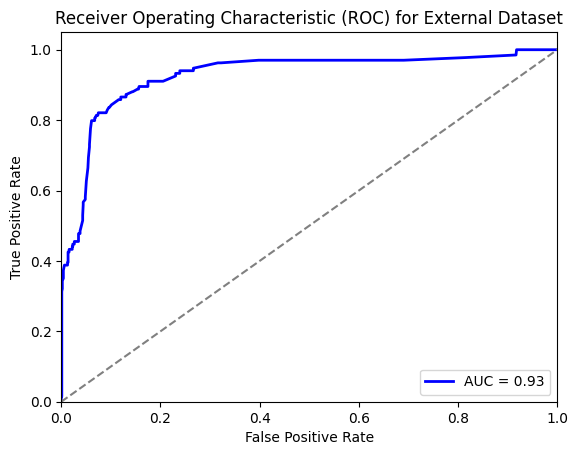

外部数据集预测结果已保存到 'external_predictions.csv'


In [8]:
# 1. 加载外部数据集
external_df = pd.read_csv(r"D:\分类数据\催化亚型活性外部验证集.csv", encoding='gbk')

# 2. 将pIC50列转化为标签（大于等于7为1，小于7为0）
external_df['label'] = np.where(external_df['pIC50'] >= 8, 1, 0)

# 3. 将外部数据集的SMILES转化为分子指纹
external_X = np.array([smiles_to_fingerprint(smiles) for smiles in external_df['smiles']])

# 4. 标签列
external_y = external_df['label']

# 5. 对外部数据集进行预测
external_preds = loaded_model.predict(external_X)
external_proba = loaded_model.predict_proba(external_X)[:, 1]

# 6. 输出外部数据集的分类报告
print("外部数据集分类报告：")
print(classification_report(external_y, external_preds))

# 7. 绘制外部数据集的AUC曲线
external_fpr, external_tpr, _ = roc_curve(external_y, external_proba)
external_roc_auc = auc(external_fpr, external_tpr)

plt.figure()
plt.plot(external_fpr, external_tpr, color='blue', lw=2, label='AUC = %0.2f' % external_roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for External Dataset')
plt.legend(loc='lower right')
plt.savefig('external_roc_curve.png')
plt.show()

# 8. 保存外部数据集预测结果
external_df['predicted_label'] = external_preds
external_df['predicted_proba'] = external_proba
external_df.to_csv(r"D:\分类数据\催化亚型活性外部验证集的活性分类结果.csv", index=False)

print("外部数据集预测结果已保存到 'external_predictions.csv'")


In [9]:
# 10. 保存训练好的模型
joblib.dump(rf_model, 'random_forest_model.pkl')

# 11. 加载模型并对外部数据集进行预测
loaded_model = joblib.load('random_forest_model.pkl')

# 假设外部数据集为external_data.csv
external_df = pd.read_csv(r"D:\新smiles\gan_asthma_data_ubstructures_matches.csv",encoding = 'gbk')

# 对外部数据集的SMILES列进行预测
external_X = np.array([smiles_to_fingerprint(smiles) for smiles in external_df['smiles']])

# 对外部数据集进行预测
external_preds = loaded_model.predict(external_X)

# 保存预测结果到文件
external_df['predicted_label'] = external_preds
external_df.to_csv(r"D:\天然产物数据库\gan-阈值为8(修正版）.csv", index=False)

print("外部数据预测结果已保存到predicted_external_data.csv")

[15:17:49] DEPRECATION WARNING: please use MorganGenerator
[15:17:49] DEPRECATION WARNING: please use MorganGenerator
[15:17:49] DEPRECATION WARNING: please use MorganGenerator
[15:17:49] DEPRECATION WARNING: please use MorganGenerator
[15:17:49] DEPRECATION WARNING: please use MorganGenerator
[15:17:49] DEPRECATION WARNING: please use MorganGenerator
[15:17:49] DEPRECATION WARNING: please use MorganGenerator
[15:17:49] DEPRECATION WARNING: please use MorganGenerator
[15:17:49] DEPRECATION WARNING: please use MorganGenerator
[15:17:49] DEPRECATION WARNING: please use MorganGenerator
[15:17:49] DEPRECATION WARNING: please use MorganGenerator
[15:17:49] DEPRECATION WARNING: please use MorganGenerator
[15:17:49] DEPRECATION WARNING: please use MorganGenerator
[15:17:49] DEPRECATION WARNING: please use MorganGenerator
[15:17:49] DEPRECATION WARNING: please use MorganGenerator
[15:17:49] DEPRECATION WARNING: please use MorganGenerator
[15:17:49] DEPRECATION WARNING: please use MorganGenerat

外部数据预测结果已保存到predicted_external_data.csv
